## Assignment : 02 - Regression Analysis

> Name: Kanaka Amin | Roll No: 42501

### Importing required libraries

In [17]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression, Ridge, Lasso  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import StandardScaler  
  
# Load the dataset  
data = pd.read_csv(r"D:\BE\ML\Lab\Datasets\uber.csv")


### Task 01: Preprocess the dataset

In [18]:
# Convert pickup_datetime to datetime format  
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])  
  
# Extract relevant features from pickup_datetime  
data['pickup_hour'] = data['pickup_datetime'].dt.hour  
data['pickup_day'] = data['pickup_datetime'].dt.day  
data['pickup_month'] = data['pickup_datetime'].dt.month  
data['pickup_year'] = data['pickup_datetime'].dt.year  
  
# Drop unnecessary columns  
data.drop(['pickup_datetime', 'key'], axis=1, inplace=True)  
  
# Handle missing values  
data.dropna(inplace=True)  
  
# Scale the data using StandardScaler  
scaler = StandardScaler()  
data[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']] = scaler.fit_transform(data[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']])


In [19]:
# Detect outliers using the IQR method  
Q1 = data['fare_amount'].quantile(0.25)  
Q3 = data['fare_amount'].quantile(0.75)  
IQR = Q3 - Q1  
  
data = data[~((data['fare_amount'] < (Q1 - 1.5 * IQR)) | (data['fare_amount'] > (Q3 + 1.5 * IQR)))]


#### -- Visualizing the data first -- 

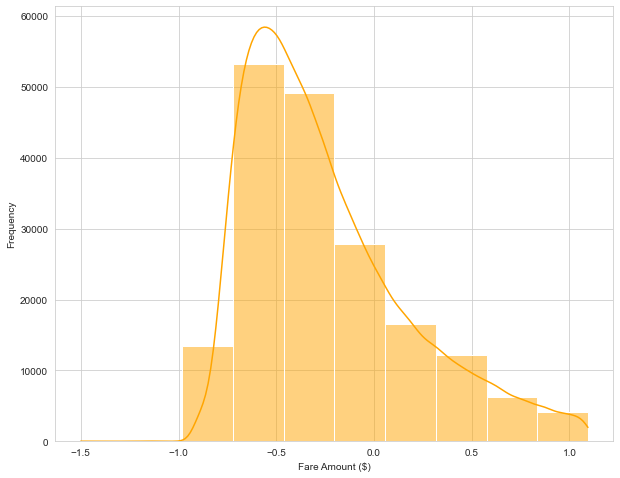

In [26]:
#plotting the data to visualize it completely 
sns.set_style('whitegrid')

#histogram of the fare_amount 
plt.figure(figsize=(10, 8))
sns.histplot(data['fare_amount'], kde=True, bins = 10, color='orange')
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()

No handles with labels found to put in legend.


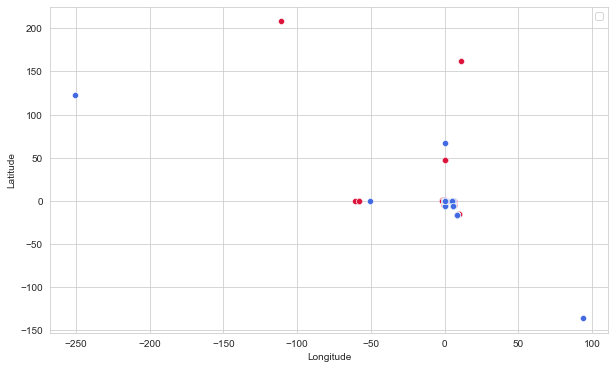

In [27]:
#scatterplot of pickup and dropoff locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data = data, color='crimson')
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data = data, color='royalblue')
plt.xlabel("Longitude")
plt.ylabel('Latitude')
plt.legend()
plt.show()

Outliers using Z-Score method: 


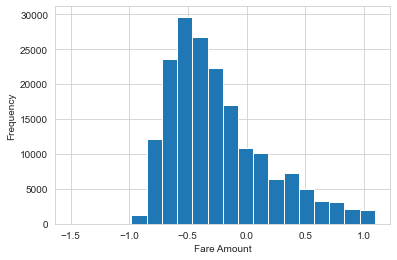

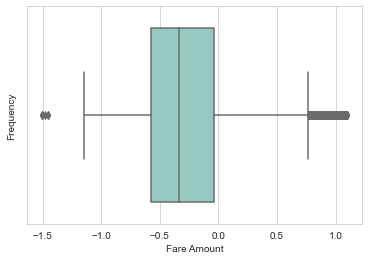

In [29]:
#outliers using zscore
def calculate_z_score(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_score = [(x-mean) / std_dev for x in data]
    return z_score

#selecting column fare_amount
data = data['fare_amount']

z_scores = calculate_z_score(data)
print("Outliers using Z-Score method: ")
#print([x for x, z in zip(data, z_scores) if abs(z) > 2])

# Plot the data
plt.hist(data, bins=20)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the data
sns.boxplot(x=data, palette='Set3')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

### Task 03: Check the correlation

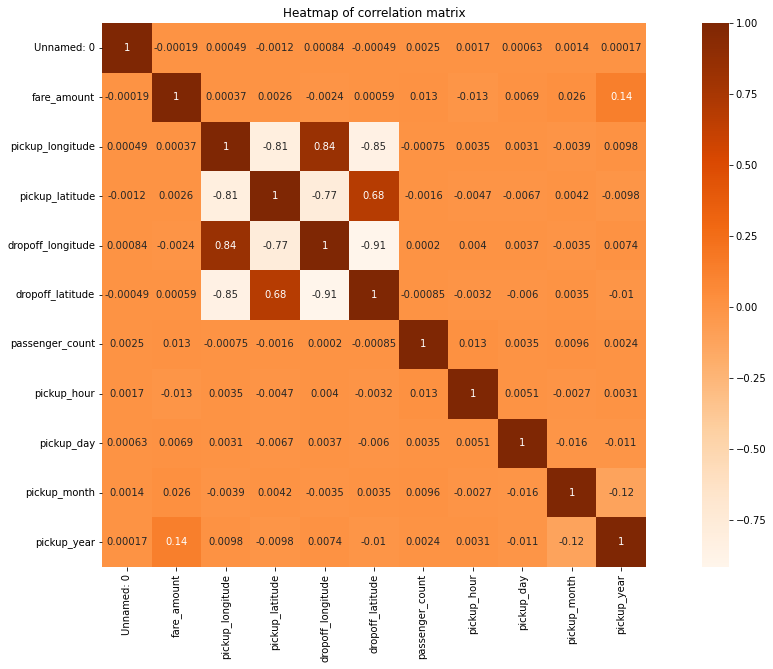

In [20]:
corr_mat = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_mat, annot=True, cmap='Oranges', square=True)
plt.title("Heatmap of correlation matrix")
plt.show()


## Key insights -

>  * Rides are in urban areas only. Because high correlation can be seen in pickup and dropoff longitudes and latitudes. [Pickup_latitude | Dropoff latitude -> 0.7]
>  * High correlations between pickup and dropoff locations because people often travel short distances within the city.
>  * Passengers count and fare amoutn has correlation of 0.01 -> Neglegible correlation, meaning the count of passengers won't affect the fare it would cost for a ride.


### Task 04: Implement linear regression and ridge, Lasso regression models

In [21]:
# Split data into features (X) and target (y)  
X = data.drop('fare_amount', axis=1)  
y = data['fare_amount']  
  
# Split data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Linear Regression  
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train)  
y_pred_lr = lr_model.predict(X_test)  
  
# Ridge Regression  
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(X_train, y_train)  
y_pred_ridge = ridge_model.predict(X_test)  
  
# Lasso Regression  
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)  
y_pred_lasso = lasso_model.predict(X_test)

### Task 05: Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [23]:
# Calculate R2 score and RMSE for each model  
lr_r2 = r2_score(y_test, y_pred_lr)  
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))  
  
ridge_r2 = r2_score(y_test, y_pred_ridge)  
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))  
  
lasso_r2 = r2_score(y_test, y_pred_lasso)  
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))  

In [33]:
# Create a DataFrame to store model performance metrics  
model_performance = pd.DataFrame({  
   'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],  
   'R2 Score': [lr_r2, ridge_r2, lasso_r2],  
   'RMSE': [lr_rmse, ridge_rmse, lasso_rmse]  
})  
  
# Print the model performance comparison table  
print('\nModel Performance Comparison:')  
model_performance.head()


Model Performance Comparison:


,Model,R2 Score,RMSE
0,Linear Regression,0.021404,0.413290
1,Ridge Regression,0.021404,0.413290
2,Lasso Regression,0.001407,0.417491


## Evaluation key points : 

>Metrics for Evaluation

 - <b>Root Mean Squared Error (RMSE)</b>: Measures the average squared difference between predicted and actual values. <b><i>Lower RMSE values indicate better model performance.</i></b>
 - <b>R-squared score</b>: Measures the proportion of variance in the dependent variable that is predictable from the independent variables. <b><i>Higher R-squared values indicate better model fit.</i></b>